In [128]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "../data/city_data.csv"
ride_data = "../data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [129]:
# Combine the data into a single dataset
cityride_df = pd.merge(city_df, ride_df, on='city')
cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [130]:
# Obtain the x and y coordinates for each of the three city types
# x_axis = np.arange(0, 45, 5)

In [131]:
# Define all metrics

num_rides = cityride_df.groupby('city')['ride_id'].count()
avg_fare = cityride_df.groupby('city')['fare'].mean()
driver_count = cityride_df.groupby('city')['driver_count'].mean()
city_type = city_df.set_index('city')['type']

num_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [132]:
# Display new dataframe

city_total = pd.DataFrame({"Number of Rides" : num_rides,
                          "Average Fare" : avg_fare,
                          "Number of Drivers" : driver_count,
                          "City Type" : city_type})

city_total.head()

,Number of Rides,Average Fare,Number of Drivers,City Type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


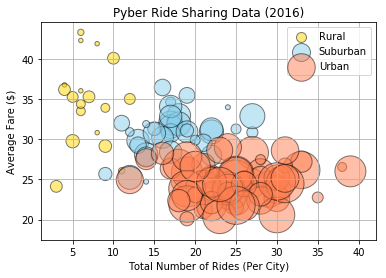

In [143]:
# Create new dataframe for each city type

rural_df = city_total[city_total['City Type'] == 'Rural']
suburban_df = city_total[city_total['City Type'] == 'Suburban']
urban_df = city_total[city_total['City Type'] == 'Urban']

#rural_df
#suburban_df
#urban_df

rural_bubble = plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], rural_df['Number of Drivers'] * 20, 
                           c="gold", label = "Rural", alpha = 0.5, edgecolor = "black", linewidths = 1)

suburban_bubble = plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], suburban_df['Number of Drivers'] * 25, 
                           c="skyblue", label = "Suburban", alpha = 0.5, edgecolor = "black", linewidths = 1)

urban_bubble = plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], urban_df['Number of Drivers'] * 20, 
                           c="coral", label = "Urban", alpha = 0.5, edgecolor = "black", linewidths = 1)


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()
plt.show()


# below creates scatter plot chart for each city type - need to combine in one
# rural_df.plot(kind='scatter', x="Number of Rides", y="Average Fare", grid=True, figsize=(10,10))
# suburban_df.plot(kind='scatter', x="Number of Rides", y="Average Fare", grid=True, figsize=(10,10))
# urban_df.plot(kind='scatter', x="Number of Rides", y="Average Fare", grid=True, figsize=(10,10))


<function matplotlib.pyplot.show(*args, **kw)>

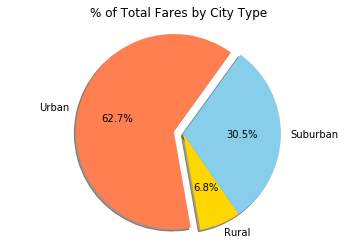

In [155]:
# Total Fares by City Type

# Calculate Type Percents
fare_city = cityride_df.groupby(["type"])["fare"].sum()
fare_city

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
explode = (0, 0, 0.1)
colors = ['gold', 'skyblue', 'coral']

plt.pie(fare_city, labels = labels, 
        explode = explode,
        colors = colors,
        autopct = "%1.1f%%", 
        shadow = True, 
        startangle = 1000)

plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.show

# Save Figure